In [ ]:
import optuna
import modules.Optimization as OP
import modules.FrameworkLib as FL
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx   
import pickle
seed = 0
random.seed(seed)
np.random.seed(seed)

N_agents = 6
max_dist = 7
threshold = 10
box_margin = 10
Niter = 1000

In [16]:
# maximize coverage
alpha = 0 

sampler = optuna.samplers.NSGAIISampler(constraints_func=OP.Objective.constraints, seed=0)
study_01 = optuna.create_study(
    directions=["maximize"],
    sampler=sampler,
    study_name="edge_relation",
    storage=None,
    load_if_exists=True,
)
study_01.optimize(OP.Objective(N_agents,max_dist,threshold,box_margin,alpha), n_trials=Niter, n_jobs=4, timeout=600)

[I 2025-03-31 12:28:14,766] A new study created in memory with name: edge_relation
[I 2025-03-31 12:28:14,777] Trial 0 finished with value: 59.88351194127038 and parameters: {'pos0': 2.1136720443969113, 'pos1': 9.849213949572714, 'pos2': 0.9226519440055081, 'pos3': 2.240708205899961, 'pos4': 6.290358877969656, 'pos5': 3.2333456431568477, 'pos6': 5.0153150723278825, 'pos7': 6.928855941910034, 'pos8': 5.064081788007574, 'pos9': 8.02839373825525, 'pos10': 6.050248218042542, 'pos11': 5.993052618060158}. Best is trial 0 with value: 59.88351194127038.
[I 2025-03-31 12:28:14,797] Trial 1 finished with value: 59.65753510137586 and parameters: {'pos0': 3.727967829804706, 'pos1': 5.912532749563663, 'pos2': 1.8083503333808693, 'pos3': 0.978762863272229, 'pos4': 3.9249662789471076, 'pos5': 5.211332611668686, 'pos6': 9.588826822735479, 'pos7': 9.595624242455429, 'pos8': 6.11669320504525, 'pos9': 6.387011869186587, 'pos10': 0.9950757592190096, 'pos11': 3.387928640781973}. Best is trial 0 with value:

In [17]:
best_trials = study_01.best_trials
trials = study_01.trials
params_array_01 = []
for trial in best_trials:    
    params_array_01.append(np.array([list(trial.params.values())]))    
params_array_01_mass = []
for trial in trials:    
    if trial.user_attrs['constraint'][1] < 0.0:
        params_array_01_mass.append(np.array([list(trial.params.values())]))

In [18]:
# maximize connectivity
alpha = 1

sampler = optuna.samplers.NSGAIISampler(constraints_func=OP.Objective.constraints, seed=0)
study_02 = optuna.create_study(
    directions=["maximize"],
    sampler=sampler,
    study_name="edge_relation",
    storage=None,
    load_if_exists=True,
)
study_02.optimize(OP.Objective(N_agents,max_dist,threshold,box_margin,alpha), n_trials=Niter, n_jobs=8, timeout=600)

[I 2025-03-31 12:28:23,120] A new study created in memory with name: edge_relation
[I 2025-03-31 12:28:23,145] Trial 0 finished with value: 4.743826196132163 and parameters: {'pos0': 3.2537456273123477, 'pos1': 8.916925823675257, 'pos2': 4.729163442381969, 'pos3': 6.652980100688708, 'pos4': 1.218938101506838, 'pos5': 0.20918278644247223, 'pos6': 2.7887545796940483, 'pos7': 4.0658022992139795, 'pos8': 9.654401175636082, 'pos9': 4.4172107419909326, 'pos10': 4.862303813108029, 'pos11': 7.451644941512151}. Best is trial 0 with value: 4.743826196132163.
[I 2025-03-31 12:28:23,148] Trial 5 finished with value: 0.0 and parameters: {'pos0': 4.776079372395531, 'pos1': 2.3344608331828507, 'pos2': 8.877861881318688, 'pos3': 1.4628089930903287, 'pos4': 2.4850785086039693, 'pos5': 0.35545493546532025, 'pos6': 8.949504691905696, 'pos7': 8.763542647125806, 'pos8': 6.057715668075737, 'pos9': 0.43704247716810474, 'pos10': 9.98552929754856, 'pos11': 0.5989533862693763}. Best is trial 0 with value: 4.743

In [19]:
best_trials = study_02.best_trials
trials = study_02.trials
params_array_02 = []
for trial in best_trials:    
    params_array_02.append(np.array([list(trial.params.values())]))    
params_array_02_mass = []
for trial in trials:        
    if trial.user_attrs['constraint'][1] < 0.0:
        params_array_02_mass.append(np.array([list(trial.params.values())]))

Dimensions of params_array_01: (82, 1, 12)
Dimensions of params_array_02: (1, 1, 12)
Dimensions of params_array_01_mass: (958, 1, 12)
Dimensions of params_array_02_mass: (994, 1, 12)


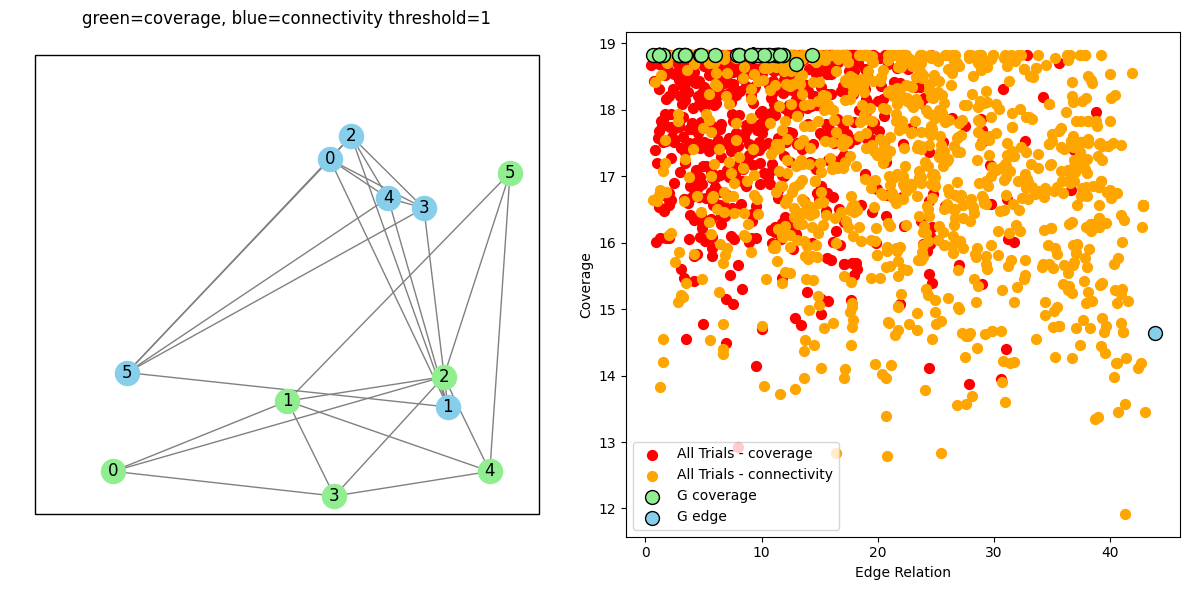

In [20]:
print("Dimensions of params_array_01:", np.array(params_array_01).shape)
print("Dimensions of params_array_02:", np.array(params_array_02).shape)
print("Dimensions of params_array_01_mass:", np.array(params_array_01_mass).shape)
print("Dimensions of params_array_02_mass:", np.array(params_array_02_mass).shape)

# Save variables to a file

variables_to_save = {
    'params_array_01': params_array_01,
    'params_array_02': params_array_02,
    'params_array_01_mass': params_array_01_mass,
    'params_array_02_mass': params_array_02_mass,
    'N_agents': N_agents,
    'box_margin': box_margin,
    'max_dist': max_dist,
    'Niter': Niter
}

name  = 'N_agents' + str(N_agents) + 'max_dist' + str(max_dist) + 'Niter' + str(Niter) + 'threshold' + str(threshold) + '_DISPCONSTRAINT.pkl'
with open('results/centralized/' + str(name), 'wb') as f:
    pickle.dump(variables_to_save, f)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_title('green=coverage, blue=connectivity threshold=' + str(threshold))
ax2.set_xlabel('Edge Relation')
ax2.set_ylabel('Coverage')

# Draw the box_margin box in the first subplot
box = plt.Rectangle((0, 0), box_margin, box_margin, fill=True, edgecolor='black', linestyle='-', facecolor='white')
ax1.add_patch(box)

for pos in params_array_01_mass:  
    pos = np.asarray(pos) 
    pos = pos.reshape((N_agents,2))
    G = FL.generate_graph(pos,max_dist)         
    ax2.scatter(FL.get_edge_relation(G), FL.get_coverage(G), color='red', s=50)
ax2.scatter([], [], color='red', label='All Trials - coverage', s=50)

for pos in params_array_02_mass: 
    pos = pos.reshape((N_agents,2))
    G = FL.generate_graph(pos,max_dist)           
    ax2.scatter(FL.get_edge_relation(G), FL.get_coverage(G), color='orange', s=50)
ax2.scatter([], [], color='orange', label='All Trials - connectivity', s=50)

max_connectivity = float('-inf')
max_connectivity_graph = None
max_connectivity_pos = None

i = 0
for pos in params_array_01:
    i += 1
    pos = pos.reshape((N_agents, 2))
    G = FL.generate_graph(pos, max_dist)
    connectivity = FL.get_edge_relation(G)
    if connectivity > max_connectivity:
        max_connectivity = connectivity
        max_connectivity_graph = G
        max_connectivity_pos = pos
        max_connectivity_i = i    
        
i = 0
for pos in params_array_01:   
    i = i + 1
    pos = pos.reshape((N_agents,2))
    G = FL.generate_graph(pos,max_dist) 
    
    if i == max_connectivity_i:
        nx.draw(G, pos=nx.get_node_attributes(G, 'pos'), with_labels=True, node_color='lightgreen', edge_color='gray', ax=ax1)
        ax2.scatter(FL.get_edge_relation(G), FL.get_coverage(G), color='lightgreen', label='G coverage', s=100,edgecolors='black')    
    else:
        ax2.scatter(FL.get_edge_relation(G), FL.get_coverage(G), color='lightgreen', s=100, edgecolors='black')
 
 
max_coverage = float('-inf')
max_coverage_graph = None
max_coverage_pos = None

i = 0
for pos in params_array_02:
    i += 1
    pos = pos.reshape((N_agents, 2))
    G = FL.generate_graph(pos, max_dist)
    coverage = FL.get_coverage(G)
    if coverage > max_coverage:
        max_coverage = coverage
        max_coverage_graph = G
        max_coverage_pos = pos  
        max_coverage_i = i    

i = 0
for pos in params_array_02:   
    i = i + 1
    pos = pos.reshape((N_agents,2))
    G = FL.generate_graph(pos,max_dist) 
    
    if i == max_coverage_i:
        nx.draw(G, pos=nx.get_node_attributes(G, 'pos'), with_labels=True, node_color='skyblue', edge_color='gray', ax=ax1)
        ax2.scatter(FL.get_edge_relation(G), FL.get_coverage(G), color='skyblue', label='G edge', s=100, edgecolors='black')
    else:
        ax2.scatter(FL.get_edge_relation(G), FL.get_coverage(G), color='skyblue', s=100, edgecolors='black')

ax2.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [21]:
import numpy as np
import plotly.graph_objects as go

# cycle over all params_array_01 and params_array_02 and save coverage, edge_relation, and EGV
coverage = []
edge_relation = []
EG4 = []
for pos in params_array_01_mass + params_array_02_mass:
    pos = pos.reshape((N_agents, 2))
    G = FL.generate_graph(pos, max_dist)        
    coverage.append(FL.get_coverage(G))
    edge_relation.append(FL.get_density(G))    
    rigid, EGVL = FL.is_rigid(G)
    EG4.append(np.real(EGVL))
        
X = np.array(coverage)
Y = np.array(edge_relation)
Z = np.array(EG4)

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=X,
    y=Y,
    z=Z,
    mode='markers',
    marker=dict(
        size=Z * 0.5,  # Increase marker size based on EG4 values
        color=Z,
        colorscale='Viridis',
        opacity=0.6  # Make markers slightly transparent
    )
)])

fig.update_layout(
    autosize=False,
    width=1200,
    height=800
)

# Set labels
fig.update_layout(
    scene=dict(
        xaxis_title='Coverage',
        yaxis_title='Edge Relation',
        zaxis_title='EG4'
    ),
    title='Interactive 3D Scatter Plot'
)

# Show the plot
fig.show()

ValueError: 
    Invalid element(s) received for the 'size' property of scatter3d.marker
        Invalid elements include: [-1.0970710807649757e-16, -3.442759993043586e-16, -2.3886398800516218e-17, -2.6339333542930843e-16, -6.494615071180798e-17, -3.532378757762708e-18, -9.5177184318535e-17, -1.3655357294375198e-16, -1.0452656375942506e-16, -2.609553738213006e-16]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above